In [1]:
from audio import *
%matplotlib inline

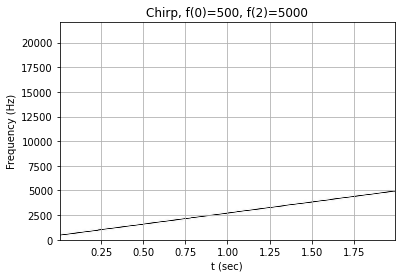

In [2]:
fs = 44100
T = 2
record_time = 10
f0 = 500
f1 = 5000

t = np.linspace(0, T, T*fs)
fsweep = chirp(t, f0=f0, f1=f1, t1=T, method='linear')

ff, tt, Sxx = spectrogram(fsweep, fs=fs, noverlap=256, nperseg=512,nfft=2048)
plt.pcolormesh(tt, ff, Sxx, cmap='gray_r')
plt.title('Chirp, f(0)={}, f({})={}'.format(f0,T,f1))
plt.xlabel('t (sec)')
plt.ylabel('Frequency (Hz)')
plt.grid()
plt.show()

In [3]:
scipy.io.wavfile.write(r"sound_files/chirp.wav", fs, fsweep)

Audio("sound_files/chirp.wav")

In [75]:
record_audio('sound_files/test_chirp.wav',record_time, fs)

Recording
Finished recording


In [95]:
play_audio('sound_files/test_chirp.wav')

In [76]:
signal, fs = get_audio('sound_files/test_chirp.wav')
fsweep_reverse = fsweep[::-1]
output = np.convolve(signal ,fsweep_reverse,mode='same')

(4.75, 4.76)

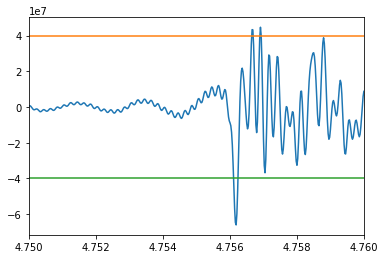

In [85]:
thresh = 40000000

time = np.linspace(0, record_time, len(output))
plt.plot(time,output)
plt.plot(time, np.full((len(time)), thresh))
plt.plot(time, np.full((len(time)), -thresh))
np.where(output == np.amax(output))
plt.xlim(4.75,4.76)

In [86]:
len(get_peaks(output, thresh))

18

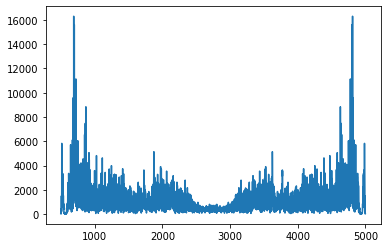

In [87]:
F = np.fft.fft(fsweep,f1)
F_measured = np.fft.fft(signal,f1)
H = F_measured / F
freq = np.linspace(f0,f1,f1)
plt.plot(freq,abs(H))